<a href="https://colab.research.google.com/github/hassanimran02/Yelp-data-analysis/blob/main/DMassignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("/DM_Assignment_02_Dataset.csv")

#1.1 checks for missing values in each column of the dataset.

In [ ]:
print("Length of data before removing missing values:", len(df))

missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

if not missing_columns.empty:
    print("Columns with missing values:")
    for column, count in missing_columns.items():
        print(f"{column}: {count} missing values")
else:
    print("No missing values found in any column.")

Length of data before removing missing values: 15403
Columns with missing values:
business_categories: 58 missing values
useful: 1 missing values
user_id: 1 missing values


#1.2.To remove rows that contain at least one missing value from the dataset, as well as rows that have invalid values in the business_id and user_id columns:

In [ ]:
df_cleaned = df.dropna()

print("Length of cleaned dataset after removing missing values:", len(df_cleaned))

df_cleaned = df_cleaned[~df_cleaned['business_id'].isin(['#NAME?', '#VALUE!'])]
df_cleaned = df_cleaned[~df_cleaned['user_id'].isin(['#NAME?', '#VALUE!'])]

print("Length of cleaned dataset after removing invalid values:", len(df_cleaned))

Length of cleaned dataset after removing missing values: 15344
Length of cleaned dataset after removing invalid values: 14914


#2.1. random subset of 10 cities from the dataset and extracting all the rows that correspond to businesses located in those cities. At last, printing the length

In [ ]:
import random
random.seed(42)

all_cities = df['business_city'].unique()
selected_cities = random.sample(list(all_cities), 10)

sample_data = df[df['business_city'].isin(selected_cities)]

print("Length of the sample data:", len(sample_data))

Length of the sample data: 3085


#3.1. summary statistics for the `stars` column of the sample data

In [ ]:
stars_summary = sample_data['stars'].describe()

print("Summary statistics for the 'stars' column:")
print(stars_summary)

Summary statistics for the 'stars' column:
count    3085.000000
mean        3.718963
std         1.250595
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: stars, dtype: float64


#3.2. For each city in the dataframe, how many unique businesses are there?

In [ ]:
city_unique_counts = df.groupby('business_city')['business_id'].nunique().reset_index()
city_unique_counts.columns = ['business_city', 'count']

count_summary = city_unique_counts['count'].describe()

print("Summary statistics for the 'count' column:")
print(count_summary)

print("Number of unique businesses for each city:")
print(city_unique_counts)

Summary statistics for the 'count' column:
count      50.000000
mean      104.700000
std       319.337084
min         1.000000
25%         2.000000
50%         7.000000
75%        21.750000
max      1938.000000
Name: count, dtype: float64
Number of unique businesses for each city:
       business_city  count
0          Ahwatukee      2
1             Anthem     11
2    Apache Junction     15
3           Avondale     42
4            Buckeye     12
5           Carefree     10
6        Casa Grande     15
7         Cave Creek     22
8           Chandler    387
9           Coolidge      2
10         El Mirage      4
11          Florence      3
12     Fort McDowell      5
13    Fountain Hills     15
14      Fountain Hls      2
15         Gila Bend      6
16           Gilbert    182
17          Glendale    230
18       Gold Canyon      7
19         Goldfield      1
20         Good Year      1
21          Goodyear     41
22         Guadalupe      3
23            Higley      1
24            Lave

#3.3. For each business category and business ID combination in the dataframe, how many unique users have rated the business?

In [ ]:
category_id_user_counts = df.groupby(['business_categories', 'business_id'])['user_id'].nunique().reset_index()
category_id_user_counts.columns = ['business_categories', 'business_id', 'count']

count_summary = category_id_user_counts['count'].describe()

print("Summary statistics for the 'count' column:")
print(count_summary)

print("Number of unique users for each business category and business ID:")
print(category_id_user_counts)

Summary statistics for the 'count' column:
count    5226.000000
mean        2.935515
std         4.120372
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        62.000000
Name: count, dtype: float64
Number of unique users for each business category and business ID:
                                    business_categories  \
0                    Accountants; Professional Services   
1     Accountants; Professional Services; Tax Servic...   
2                                           Active Life   
3                                           Active Life   
4                                           Active Life   
...                                                 ...   
5221  Women's Clothing; Used, Vintage & Consignment;...   
5222  Women's Clothing; Used, Vintage & Consignment;...   
5223  Women's Clothing; Used, Vintage & Consignment;...   
5224  Women's Clothing; Used, Vintage & Consignment;...   
5225  Yoga; Beauty & Spas; Food; Juice Bars &

#4. Plotting and Analysis
Distribution of Stars by City:

<ipython-input-17-281a9a491535>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


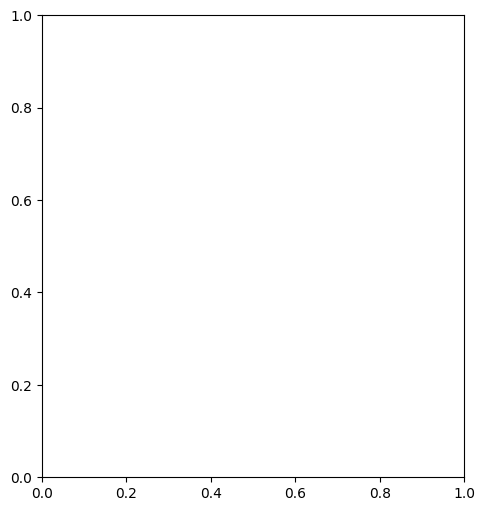

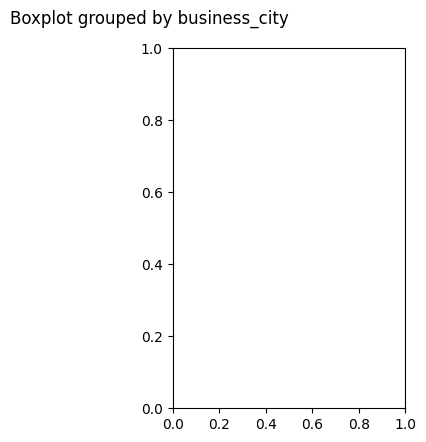

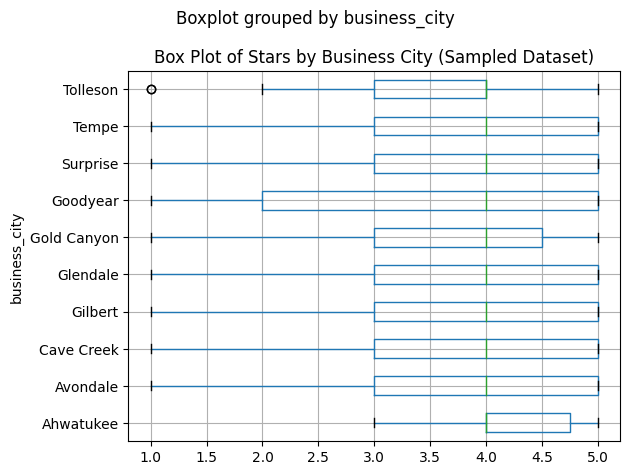

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df_cleaned.boxplot(column='stars', by='business_city', vert=False)
plt.title('Box Plot of Stars by Business City (Cleaned Dataset)')

plt.subplot(1, 2, 2)
sample_data.boxplot(column='stars', by='business_city', vert=False)
plt.title('Box Plot of Stars by Business City (Sampled Dataset)')

plt.tight_layout()

plt.show()

Distribution of Stars by Business Categories:

<ipython-input-24-d2464a4ecbfc>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


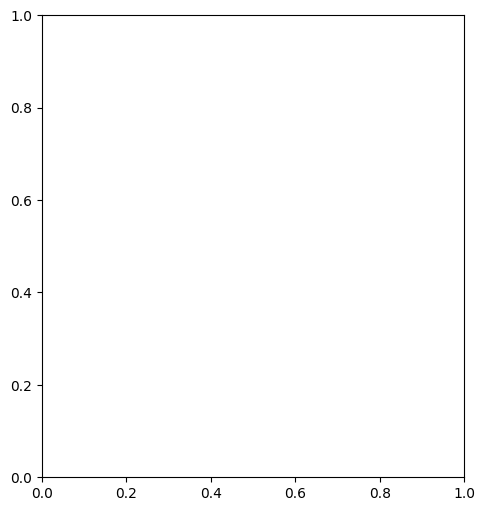

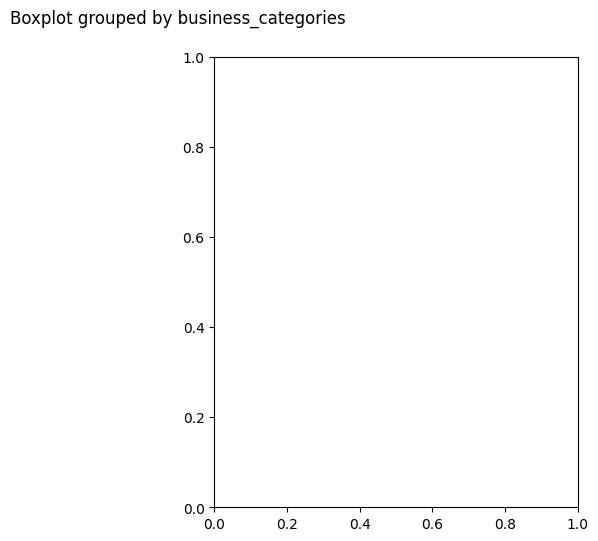

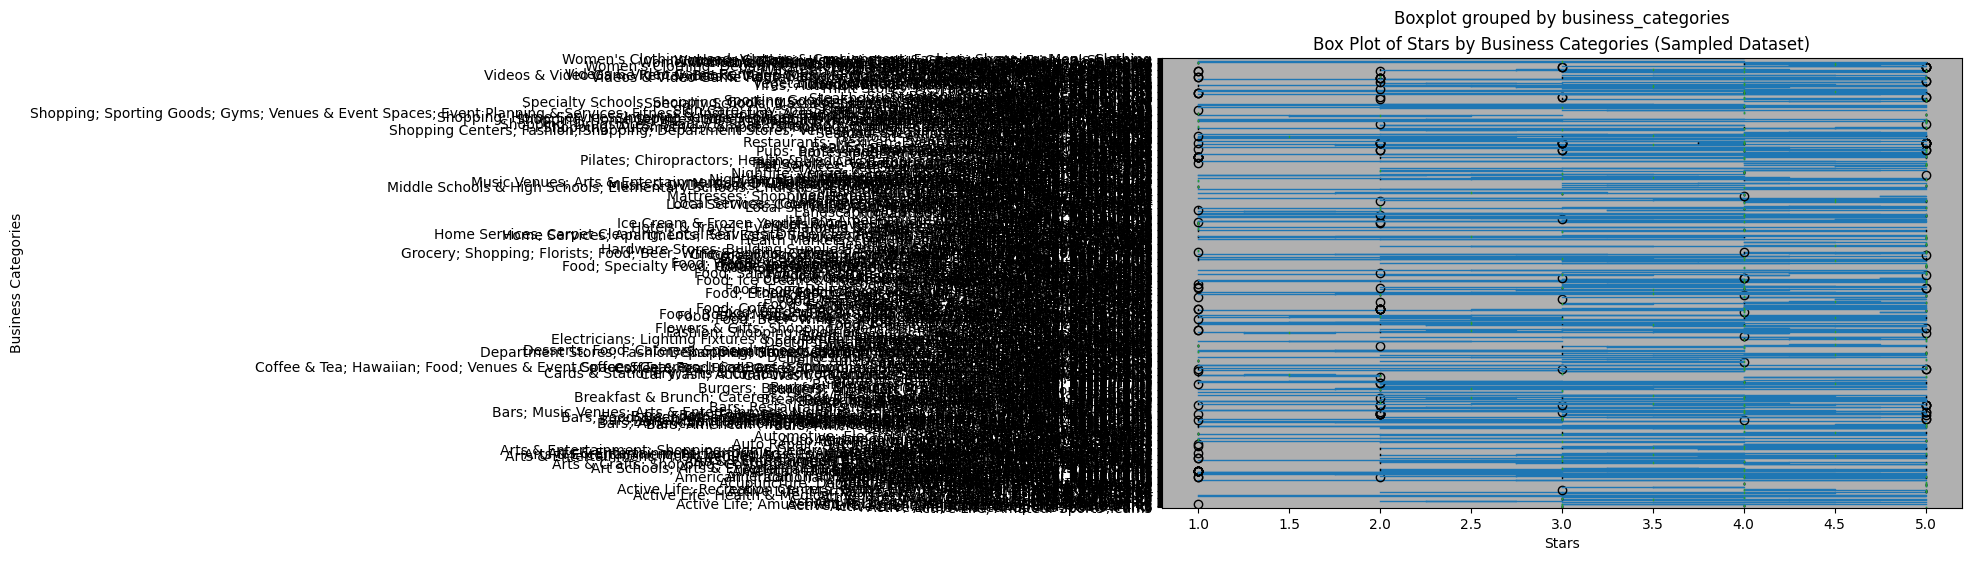

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df_cleaned.boxplot(column='stars', by='business_categories', vert=False, figsize=(10, 6))
plt.title('Box Plot of Stars by Business Categories (Cleaned Dataset)')
plt.xlabel('Stars')
plt.ylabel('Business Categories')

plt.subplot(1, 2, 2)
sample_data.boxplot(column='stars', by='business_categories', vert=False, figsize=(10, 6))
plt.title('Box Plot of Stars by Business Categories (Sampled Dataset)')
plt.xlabel('Stars')
plt.ylabel('Business Categories')


plt.show()

Correlation between Useful Votes and Stars:

Correlation coefficient (Cleaned Dataset): -0.026941262105386755
Correlation coefficient (Sampled Dataset): nan


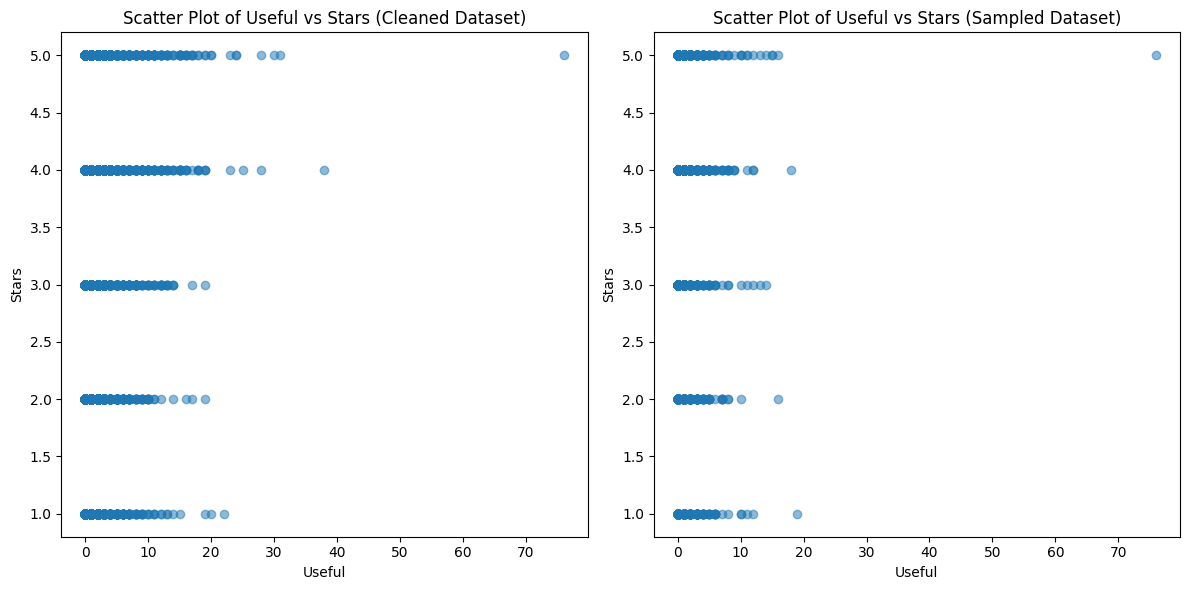

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df_cleaned['useful'], df_cleaned['stars'], alpha=0.5)
plt.title('Scatter Plot of Useful vs Stars (Cleaned Dataset)')
plt.xlabel('Useful')
plt.ylabel('Stars')

# Scatter plot of useful vs stars in the sampled dataset
plt.subplot(1, 2, 2)
plt.scatter(sample_data['useful'], sample_data['stars'], alpha=0.5)
plt.title('Scatter Plot of Useful vs Stars (Sampled Dataset)')
plt.xlabel('Useful')
plt.ylabel('Stars')

plt.tight_layout()

# Calculate the correlation coefficient between useful and stars
cleaned_corr = np.corrcoef(df_cleaned['useful'], df_cleaned['stars'])[0, 1]
sampled_corr = np.corrcoef(sample_data['useful'], sample_data['stars'])[0, 1]

# Print the correlation coefficients
print("Correlation coefficient (Cleaned Dataset):", cleaned_corr)
print("Correlation coefficient (Sampled Dataset):", sampled_corr)

# Display the plots
plt.show()